In [1]:
import pickle

In [2]:

############Adjustments##############

#options
PATH = '/media/sf_SF/Stage2021/targetedQE/' 
OPTION = 'area' # area or label


## Adjustments

filename_Y_labels = 'total_y_matrix.txt'

########################



# load libraries
import pandas as pd
import os
import random
from PIL import Image
import numpy as np


#set paths
path_data_in = PATH + 'data/input/' + 'MachineLearning/'
path_data_out = PATH + 'data/output/' + 'MachineLearning/'
path_data_X = path_data_in + 'X_arrays_5110/' #png's
path_data_y = path_data_in + 'Yarrays/' #labels


filename = path_data_y + filename_Y_labels

y = pd.read_csv(filename, sep = "\t")

filenames_X_train = []
filenames_X_test = []
directory_list = os.listdir(path_data_X)
random.shuffle(directory_list)
os.chdir(path_data_X)

i = 0
for filename in directory_list:
    if ".png" in filename :
        if i % 3 == 0: 
            filenames_X_test.append(path_data_X + filename)
        else:
            filenames_X_train.append(path_data_X + filename)
        i = i + 1
    
def load_X_if_matched_in_y(filenames_list, y):
    all_images_as_array=[]
    label=[] 
    area = []   
    global ordered_filenames
    ordered_filenames=pd.DataFrame()
    
    for filename in filenames_list:
        filename_wopath = filename.split('X_arrays_5110/')[1]
        filename_wopath = filename_wopath.strip(".png")

        matching_y = y[y.SampleTargetedcombination==filename_wopath]
        if len(matching_y) == 1:
            label.append(matching_y.iloc[0,5]) 
            ar = matching_y.iloc[0,3]
            area.append(ar)
        
            img=Image.open(filename)
            np_array = np.asarray(img)

            l,b,c = np_array.shape    
            np_array = np_array.reshape(l*b*c,)   
            all_images_as_array.append(np_array)
            
            file_area = pd.DataFrame(np.array([[filename_wopath,ar]]))
            ordered_filenames = ordered_filenames.append(file_area, ignore_index=True)
            
            
        if len(matching_y) != 1:
            continue
        
    if OPTION == 'area':
        option = area
    else:
        option = label       
    return np.array(all_images_as_array), np.array(option)
    
X_train,y_train = load_X_if_matched_in_y(filenames_X_train, y)
X_test, y_test = load_X_if_matched_in_y(filenames_X_test, y)

print(len(y_train))
print(len(X_train))
print(len(y_test))
print(len(X_test))

print(ordered_filenames)
print(len(ordered_filenames))

2413
2413
1220
1220
                                                  0                   1
0                         200805s067_2Butoxyethanol                 0.0
1                         200805s073_2Butoxyethanol                 0.0
2                      200805s029_5Aminovalericacid  1498741646.6345801
3                   200805s030_Skatole3methylindole    752184.659345862
4                       200805s065_3Phenyl1propanol                 0.0
...                                             ...                 ...
1215                        200805s058_Hexanoicacid     122603.61581247
1216                         200929s041_LLacticacid    11753729898.1477
1217                          200805s042_Tryptamine    3057681.96079984
1218  200805s051_SodiumtaurodeoxycholatehydrateTDCA                 0.0
1219                         200805s074_Valericacid   533802.0378359071

[1220 rows x 2 columns]
1220


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import linear_model, datasets
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree


In [4]:
print("Fitting Random Forest regression on training set")

# Fitting the regression model to the dataset
regressor = RandomForestRegressor(n_estimators=100, max_depth=200, random_state = 18)
regressor.fit(X_train, y_train) # Using ravel() to avoid getting 'DataConversionWarning' warning message

#------------------------------------------------------------------------------------------------------------------------#


#------------------------------------------------------------------------------------------------------------------------#
print("\n")
print("Getting Model Accuracy...")

# Get regression details
#print("Estimated Coefficient = ", regressor.coef_)
#print("Estimated Intercept = ", regressor.intercept_)
print("Training Accuracy = ", regressor.score(X_train, y_train))
print("Test Accuracy = ", regressor.score(X_test, y_test))



Fitting Random Forest regression on training set


Getting Model Accuracy...
Training Accuracy =  0.9606471676654517
Test Accuracy =  0.8082418764296865


In [5]:
import pickle

In [6]:
filename = 'regressor_3105_1550.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [7]:
y_pred = regressor.predict(X_test)

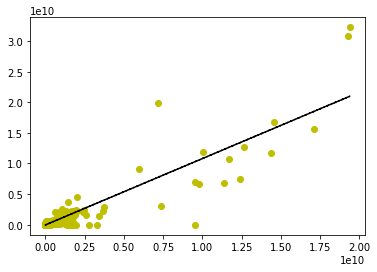

In [8]:
coef = np.polyfit(y_pred,y_test,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_pred,y_test, 'yo', y_pred, poly1d_fn(y_pred), '--k')

In [9]:
df = pd.DataFrame(data=y_pred)
print(df)

                 0
0     8.736639e+05
1     4.378263e+06
2     1.653226e+09
3     5.614744e+06
4     6.140812e+06
...            ...
1215  2.423892e+05
1216  1.438765e+10
1217  4.762363e+06
1218  1.053529e+06
1219  1.693823e+06

[1220 rows x 1 columns]


In [10]:
result=pd.concat([ordered_filenames, df], axis=1)

In [11]:
result.to_csv('y_pred_with_regressor_3105_1550.txt', sep="\t")